<h2 style="color:blue" align="left"> Task 1: Prediction using Unsupervised ML </h2>


### Simple Linear Regression 

## Objective

- Predict the optimum number of cluster on iris dataset.

### Author
Anuganti Suresh 

------------------------------

### INTRODUCTION : "IRIS" dataset

![2. Prediction using Unsupervised ML](image/iris_Final_1.JPG)

![2. Prediction using Unsupervised ML](image/iris_Final_2.JPG)

- **Iris dataset** is the Hello World for the Data Science, so if you have started your career in Data Science and Machine Learning you will be practicing basic ML algorithms on this famous dataset.


- Iris dataset contains five columns such as:

  - Petal Length
  - Petal Width
  - Sepal Length
  - Sepal Width
  - Species


- Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded digitally


- The iris dataset contains the following data
 
 - 50 samples of 3 different species of iris (150 samples total)
 
 - There are 50 observations of each species for a total of 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).


- Measurements: sepal length, sepal width, petal length, petal width
 
 - The format for the data: (sepal length, sepal width, petal length, petal width)

### The 4 features are

- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm

### The target class

The flower species type is the target class and it having 3 types

- Setosa
- Versicolor
- Virginica

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read data
import numpy as np                           # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                          # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt              # Visualization using matplotlib
%matplotlib inline
import seaborn as sns                        # Visualization using seaborn

# style
plt.style.use("fivethirtyeight")             # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")                    # Set Graphs Background style using seaborn

import warnings                              # To ignore any warnings
warnings.filterwarnings("ignore")

<h2 style=color:blue align="left"> 2. EDA(Exploratory Data Analysis) </h2>

<h2 style=color:green align="left"> a. Understand the data </h2>

In [3]:
# Loading the "iris" dataset
df = pd.read_csv("Iris.csv")

In [4]:
# import first & last 5 rows
display(df.head())
display(df.tail())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Displaying the number of rows randomly
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
39,40,5.1,3.4,1.5,0.2,Iris-setosa
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
101,102,5.8,2.7,5.1,1.9,Iris-virginica
139,140,6.9,3.1,5.4,2.1,Iris-virginica
28,29,5.2,3.4,1.4,0.2,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa


In [6]:
# checking dimension (num of rows and columns) of dataset
print("iris data shape (Rows, Columns):", df.shape)

iris data shape (Rows, Columns): (150, 6)


In [7]:
# check dataframe structure like columns and its counts, datatypes & Null Values
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.dtypes.value_counts()

float64    4
int64      1
object     1
dtype: int64

In [10]:
# Gives number of data points in each variable
df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [11]:
# descriptive statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
print('Iris-setosa')
setosa = df['Species'] == 'Iris-setosa'
print(df[setosa].describe())

print('\nIris-versicolor')
versicolor = df['Species'] == 'Iris-versicolor'
print(df[versicolor].describe())

print('\nIris-virginica')
virginica = df['Species'] == 'Iris-virginica'
print(df[virginica].describe())

Iris-setosa
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

Iris-versicolor
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min  

### i) SepalLengthCm

In [13]:
df['SepalLengthCm'].nunique()

35

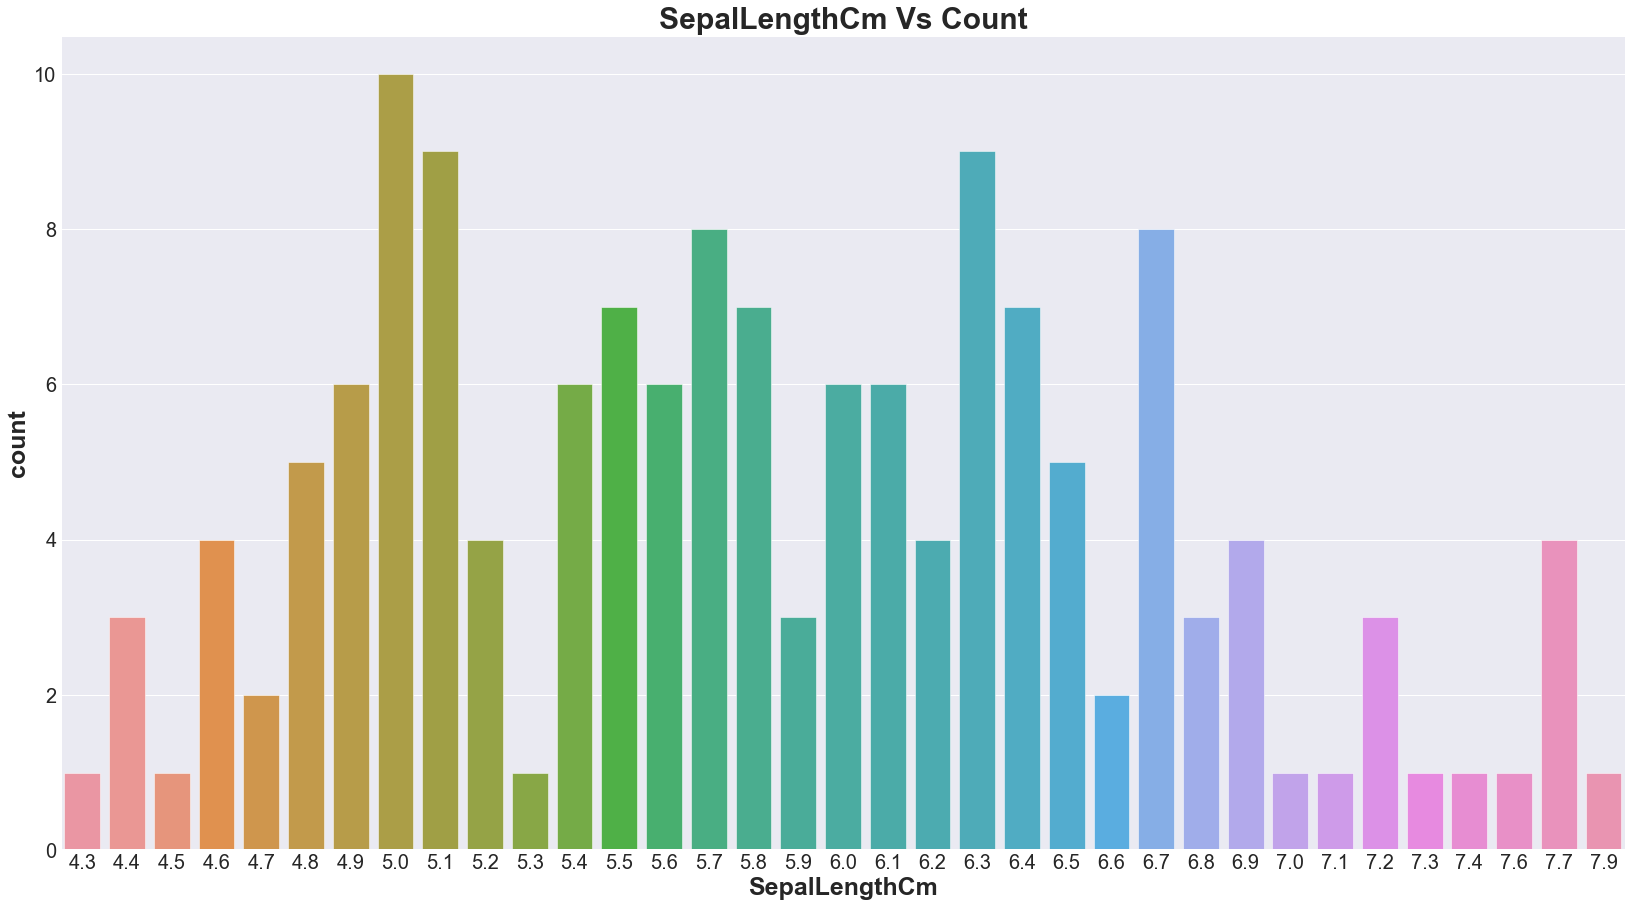

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: SepalLengthCm, dtype: int64


In [14]:
plt.figure(figsize=(25,15))

sns.countplot(df['SepalLengthCm'])

plt.xlabel('SepalLengthCm', fontsize=25, fontweight='bold')
plt.ylabel('count', fontsize=25, fontweight='bold')

plt.title('SepalLengthCm Vs Count', fontsize=30, fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print(df['SepalLengthCm'].value_counts())

### ii) SepalWidthCm

In [15]:
df['SepalWidthCm'].nunique()

23

3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: SepalWidthCm, dtype: int64


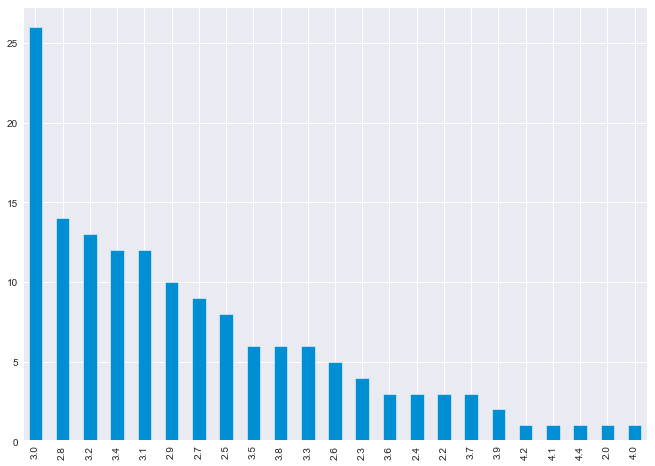

In [16]:
plt.figure(figsize=(10,8))
print(df['SepalWidthCm'].value_counts())
df['SepalWidthCm'].value_counts().plot.bar()

### iii) PetalLengthCm

In [17]:
df['PetalLengthCm'].nunique()

43

1.5    14
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: PetalLengthCm, dtype: int64


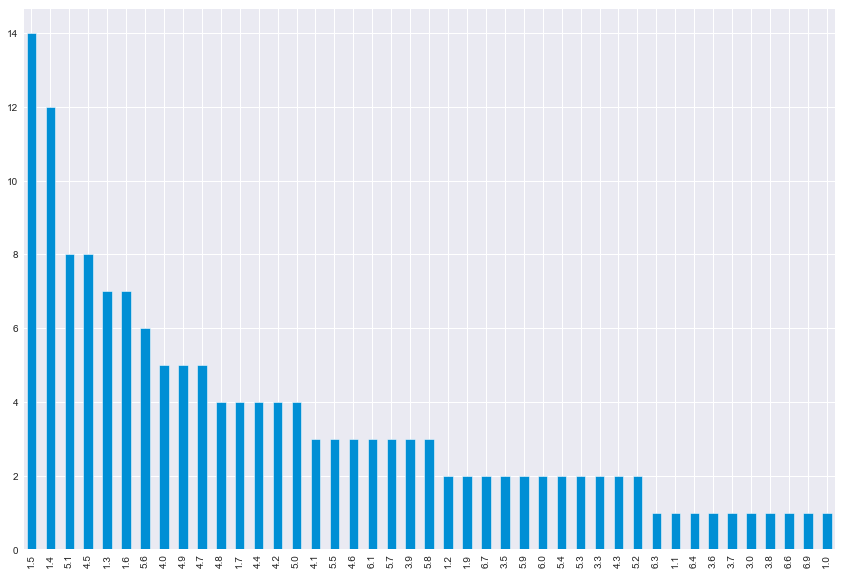

In [18]:
plt.figure(figsize=(13,10))
print(df['PetalLengthCm'].value_counts())
df['PetalLengthCm'].value_counts().plot.bar()

### iv) PetalWidthCm

In [19]:
df['PetalWidthCm'].nunique()

22

0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
0.1     6
2.0     6
2.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64


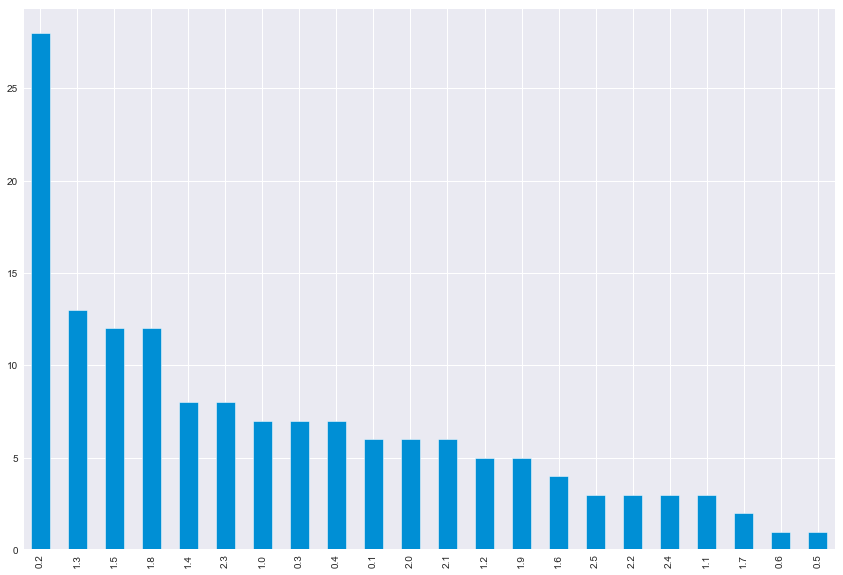

In [20]:
plt.figure(figsize=(13,10))
print(df['PetalWidthCm'].value_counts())
df['PetalWidthCm'].value_counts().plot.bar()

### v) Species

In [21]:
df['Species'].nunique()

3

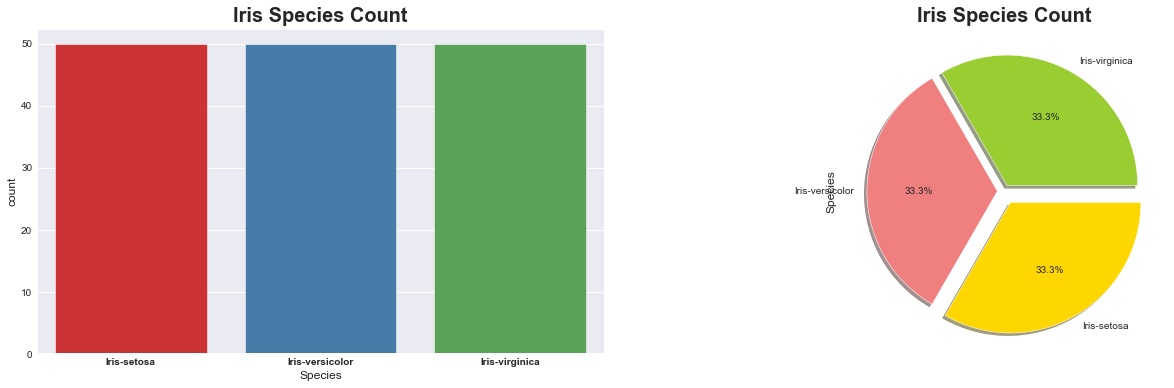

In [22]:
plt.figure(figsize=(20, 6))

cols = ['yellowgreen', 'lightcoral','gold']
plt.subplot(1,2,1)
sns.countplot('Species',data=df, palette='Set1')
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")

plt.subplot(1,2,2)
df['Species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")

plt.show()

- In this case we are plotting the frequency of the three species in the Iris Dataset

- We can see that there are 50 samples each of all the Iris Species in the data set.

<h2 style=color:green align="left"> b. Clean the data </h2>

### i) Drop unwanted features

In [23]:
df.drop("Id", axis=1, inplace=True)

### ii) Missing Values

In [24]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

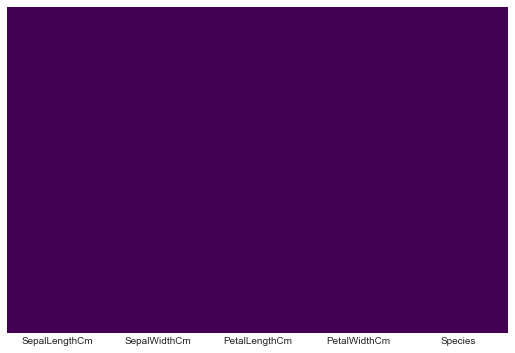

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<h2 style=color:green align="left"> c. Find Outliers </h2>

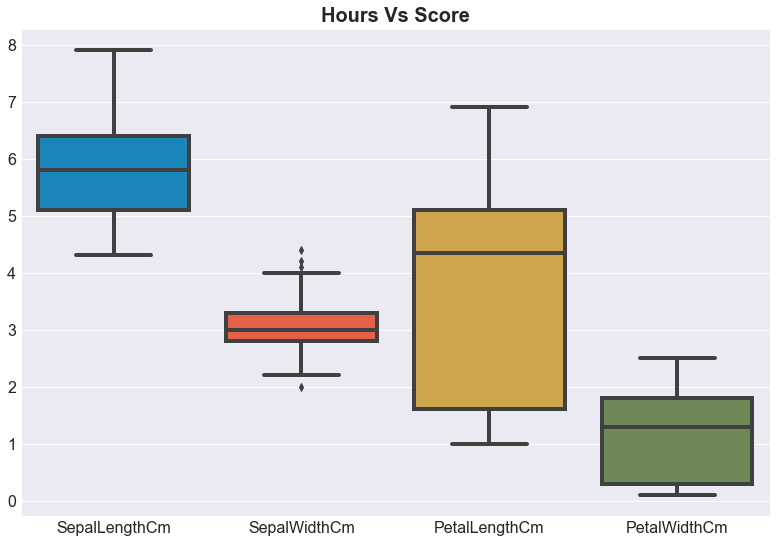

In [26]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df)

plt.title("Hours Vs Score", fontsize=20, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<h2 style=color:green align="left"> d. Skew and Kurtosis </h2>

In [27]:
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

Text(0.5, 1.0, 'Skew:0.3149109566369728')

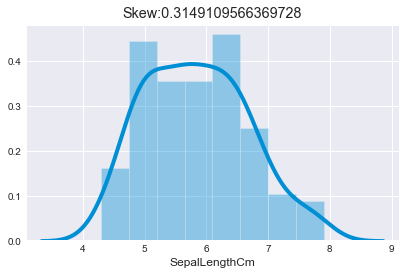

In [28]:
sns.distplot(df['SepalLengthCm'])
Skew_sepallength = df['SepalLengthCm'].skew()
plt.title("Skew:"+str(Skew_sepallength))

Text(0.5, 1.0, 'Skew:0.3340526621720866')

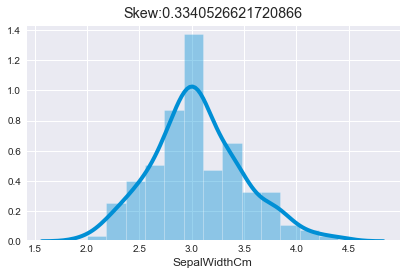

In [29]:
sns.distplot(df['SepalWidthCm'])
Skew_sepalwidth = df['SepalWidthCm'].skew()
plt.title("Skew:"+str(Skew_sepalwidth))

Text(0.5, 1.0, 'Skew:-0.27446425247378287')

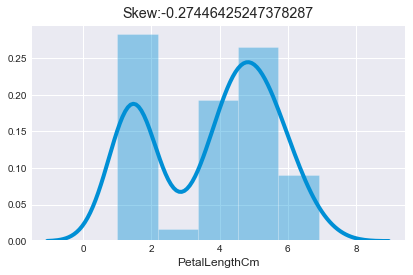

In [30]:
sns.distplot(df['PetalLengthCm'])
Skew_petallength = df['PetalLengthCm'].skew()
plt.title("Skew:"+str(Skew_petallength))

Text(0.5, 1.0, 'Skew:-0.10499656214412734')

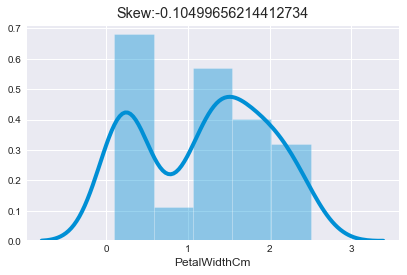

In [31]:
sns.distplot(df['PetalWidthCm'])
Skew_petalwidth = df['PetalWidthCm'].skew()
plt.title("Skew:"+str(Skew_petalwidth))

<h2 style=color:green align="left"> e. Analysis of Relationship between variables </h2>

### i) Correlation with the variable of interest

In [32]:
df.corr()['SepalLengthCm']

SepalLengthCm    1.000000
SepalWidthCm    -0.109369
PetalLengthCm    0.871754
PetalWidthCm     0.817954
Name: SepalLengthCm, dtype: float64

### ii) Heatmap

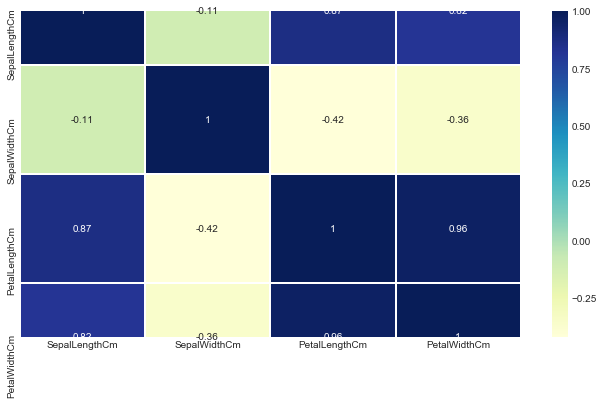

In [33]:
plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(), annot=True, linecolor = 'white', linewidths = 1, cmap="YlGnBu")
plt.show()

<h2 style=color:green align="left"> d. Data Visualisation </h2>

### i) Univariate Analysis

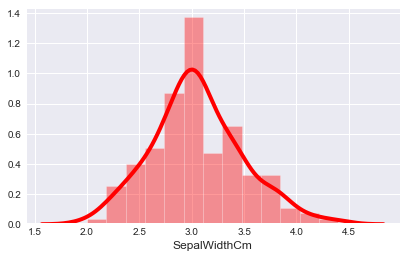

In [34]:
sns.distplot(df.SepalWidthCm, color = 'red')
plt.show()

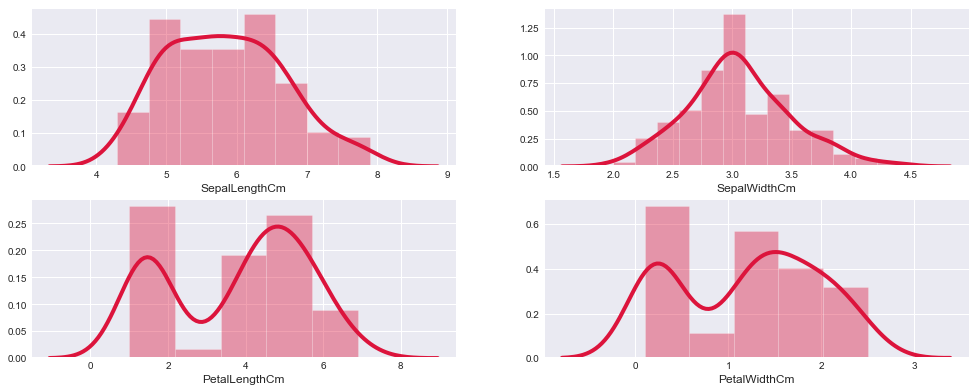

In [35]:
plt.figure(figsize = (15,10))
feature = df.columns[0:4]
for i in enumerate(feature):
    plt.subplot(3,2, i[0]+1)
    sns.distplot(df[i[1]], color='crimson')

- We can see that Sepal Length and Sepal Width columns are normally distributed. And Petal Length and Petal Width columns have skewness in the data.

- We will use Petal_length and petal_width for cluster profiling.

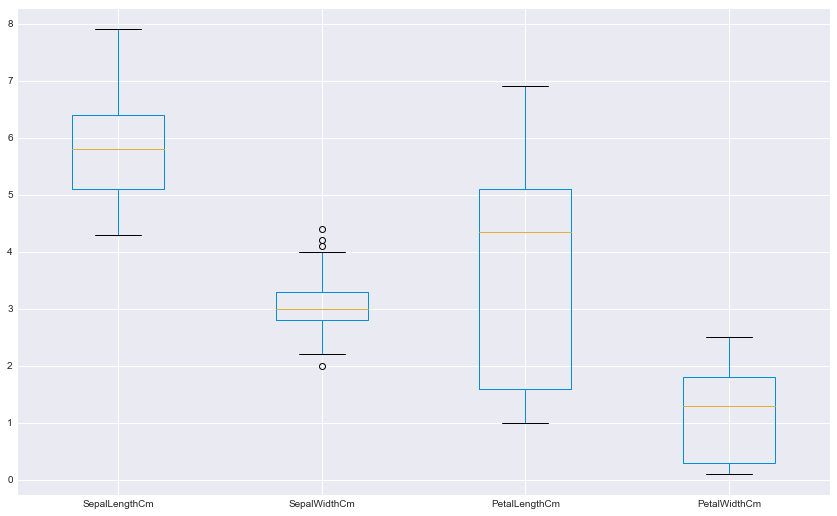

In [36]:
plt.figure(figsize = (13, 9)) 
df.boxplot()
plt.show()

### ii) Bivariate Analysis

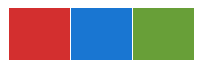

In [37]:
# Setting color palette
colors = ['#D32F2F','#1976D2','#689F38']
sns.palplot(sns.color_palette(colors))

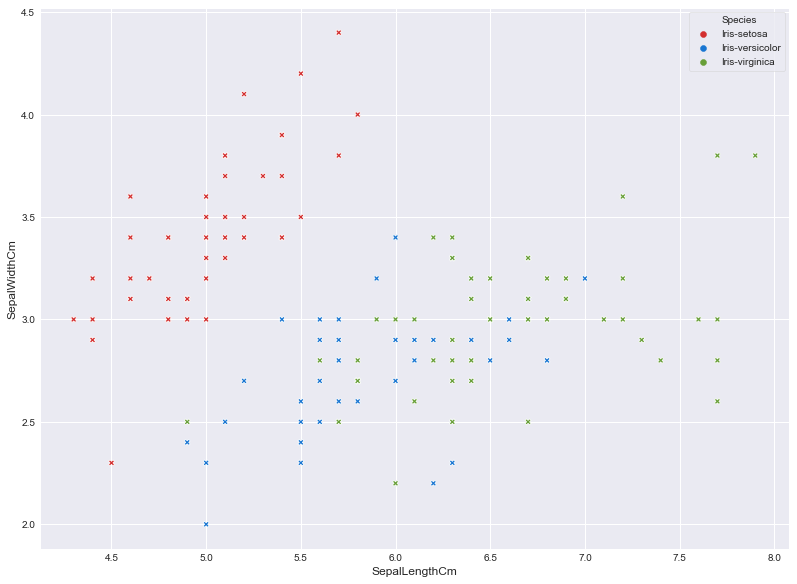

In [38]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, palette=colors, marker="X")
plt.show()

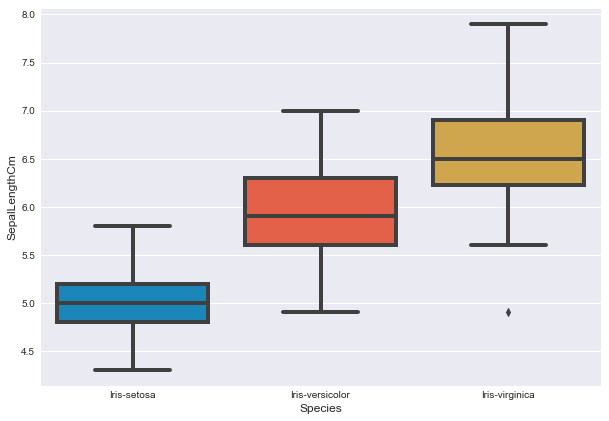

In [39]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df, x='Species', y='SepalLengthCm')
plt.show()

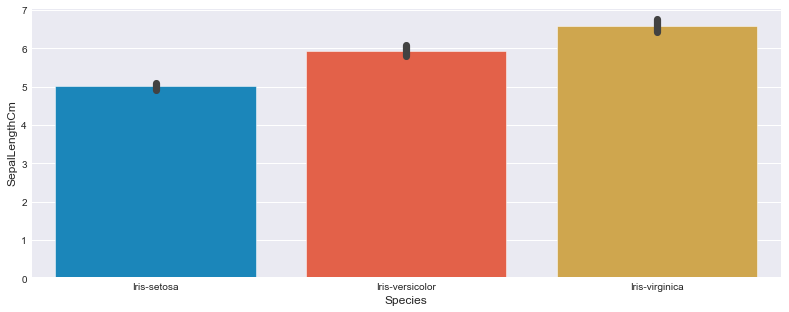

In [40]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['SepalLengthCm'],data=df)
plt.show()

- from above figure **setosa** has the **shorter** sepal lenght and virginica has **longer**

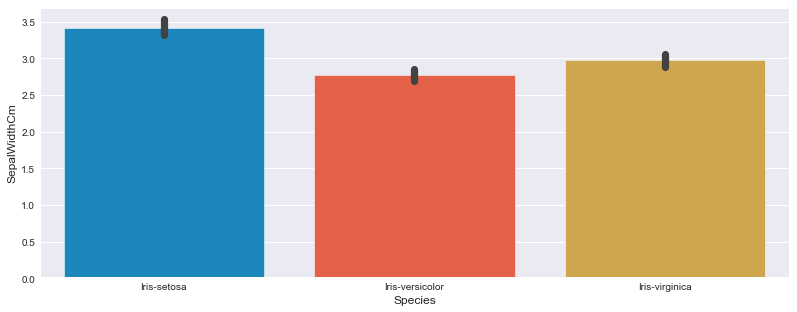

In [41]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['SepalWidthCm'],data=df)
plt.show()

- **setosa** has the **longer** Sepalwidth and **Versicolor** has **shorter** Sepalwidth

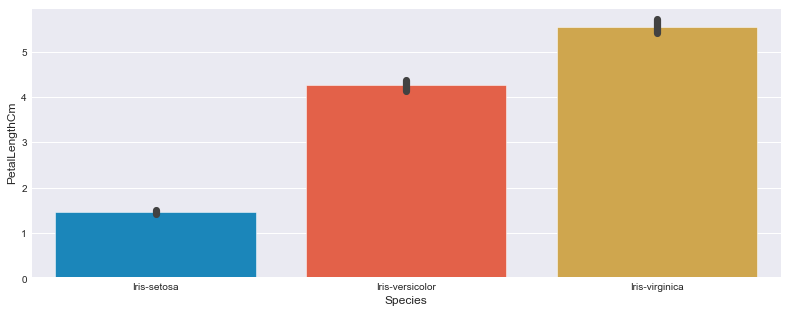

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['PetalLengthCm'],data=df)
plt.show()

- **setosa** has the **shorter** Petallength and **Virginica** has **longer** Petallength

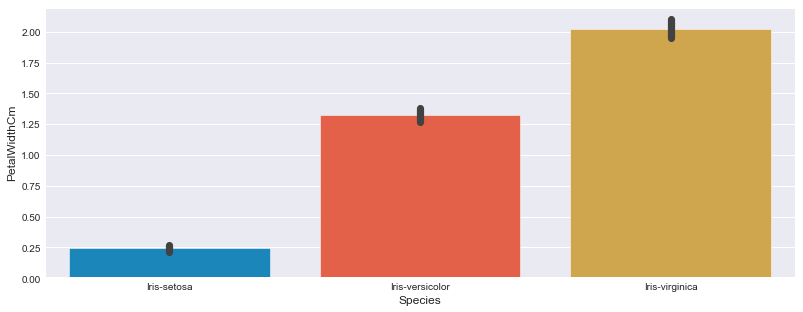

In [43]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['PetalWidthCm'],data=df)
plt.show()

- **setosa** has the **shorter** Petalwidth and **Virginica** has **longer** Petalwidth

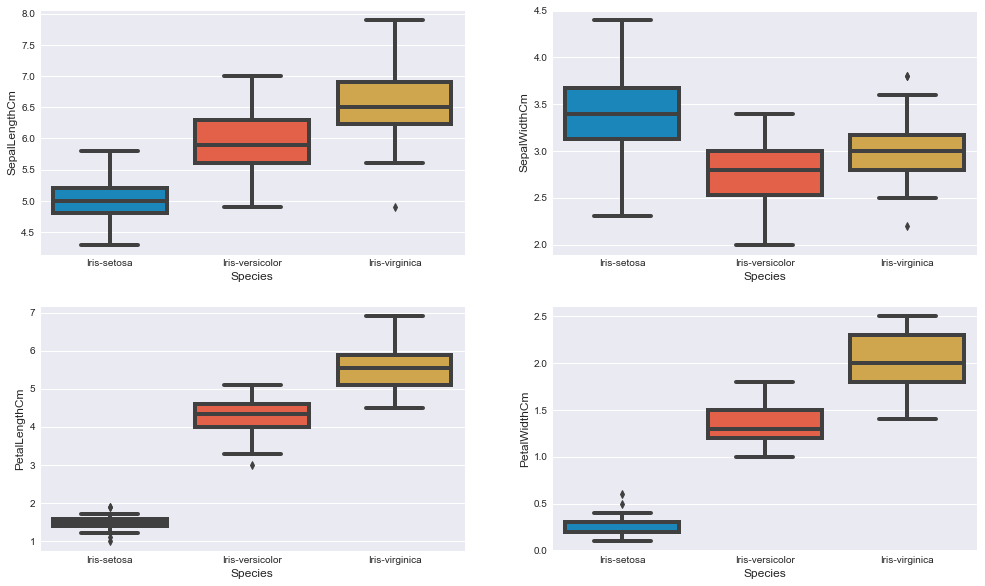

In [44]:
# Boxplot    
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='Species', y='SepalLengthCm', data=df)    
plt.subplot(2,2,2)    
sns.boxplot(x='Species', y='SepalWidthCm', data=df)    
plt.subplot(2,2,3)    
sns.boxplot(x='Species', y='PetalLengthCm', data=df)    
plt.subplot(2,2,4)    
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

### iii) Multivariate Analysis

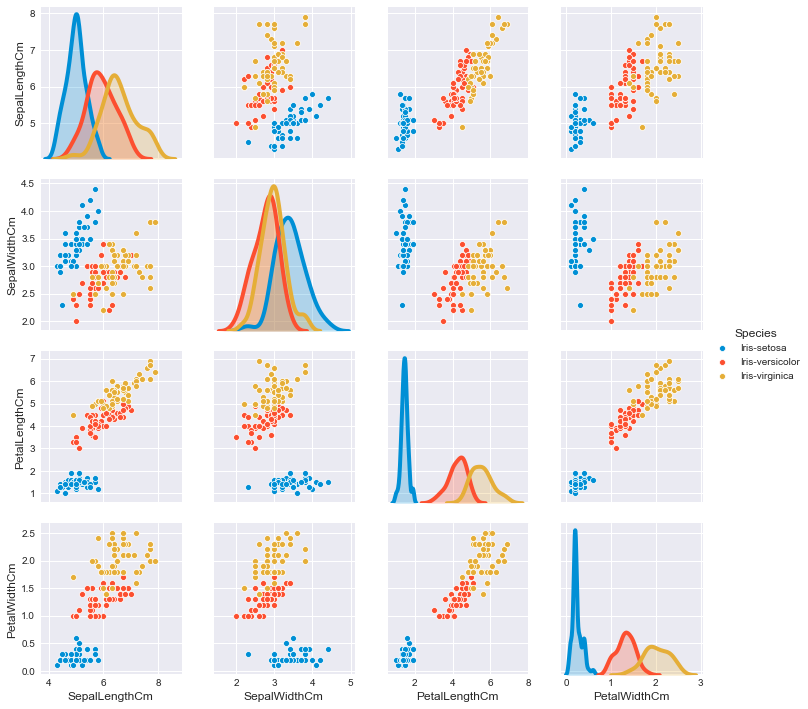

In [45]:
# Pairplot
sns.pairplot(df, hue='Species')
plt.show()

- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a **iris-setosa (in blue)** is distinctly different from those of the other **two species**.

- There is some **overlap** in the pairwise relationships of the other two species, **iris-versicolor (brown) and iris-virginica (green)**.

<h2 style="color:blue" align="left"> 3. Model building and Evaluation </h2>

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [47]:
# independent variable
x=df.drop(['Species'],axis=1)

# dependent variable
y=df['Species']

In [48]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [49]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### 1. KNN

In [51]:
from sklearn.cluster import KMeans
features  = df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

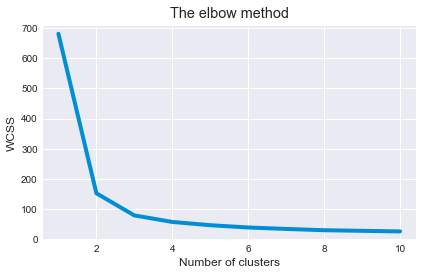

In [52]:
# Plotting the elbow graph

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [53]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)

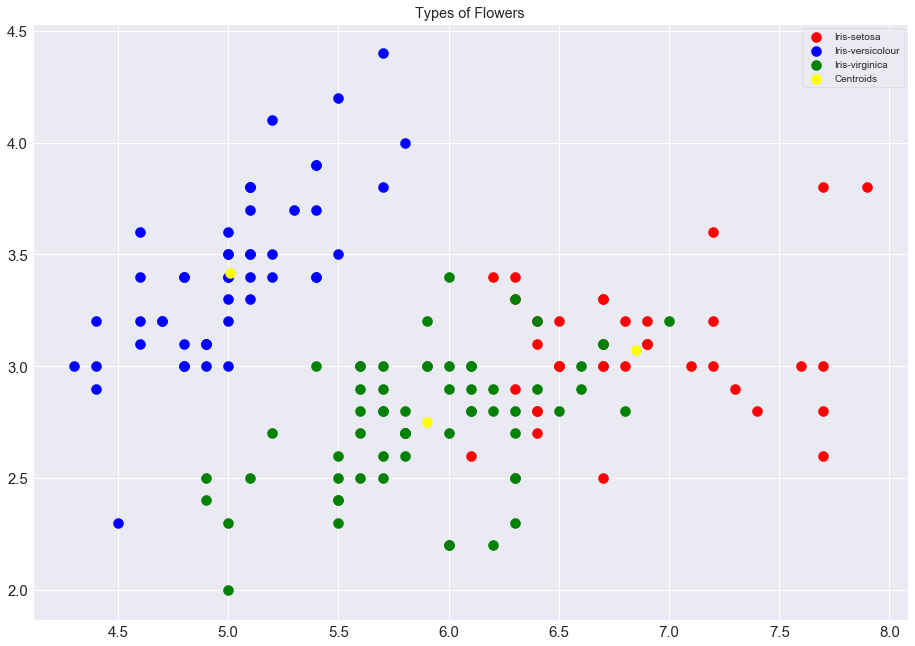

In [54]:
# Visualising the clusters
plt.figure(figsize=(14,11))
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Types of Flowers')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend()

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
list_1=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds = knn.predict(x_test)
    scores = accuracy_score(y_test,preds)
    list_1.append(scores)

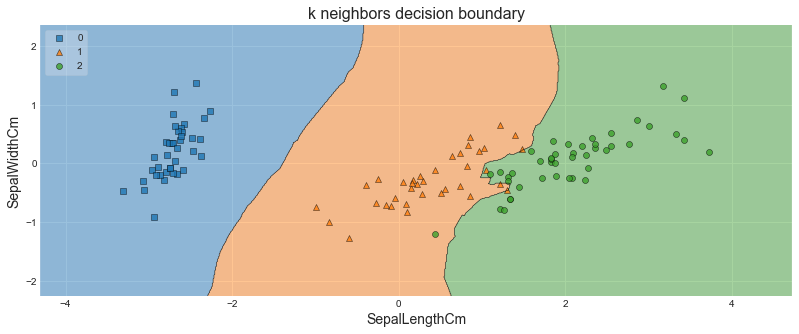

In [57]:
# lets plot the decisoin boundary for the kneighbors classifier

from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

knn = KNeighborsClassifier(n_neighbors=3)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)

knn.fit(X_train2, y_train)

plt.figure(figsize=(12,5))
plot_decision_regions(X_train2, y_train.values, clf=knn, legend=2)

plt.xlabel(df.columns[0], size=14)
plt.ylabel(df.columns[1], size=14)
plt.title('k neighbors decision boundary', size=16)

plt.show()

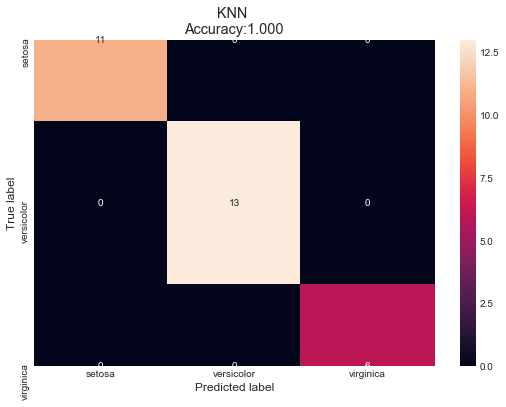

In [58]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, preds)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [59]:
print(accuracy_score(y_test, preds))    
print(confusion_matrix(y_test, preds))    
print(classification_report(y_test, preds)) 

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 2. SVM

In [60]:
from sklearn import svm
svn = svm.SVC()    
svn.fit(x_train, y_train)    
predictions = svn.predict(x_test)    
print(accuracy_score(y_test, predictions))    
print(confusion_matrix(y_test, predictions))    
print(classification_report(y_test, predictions)) 

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



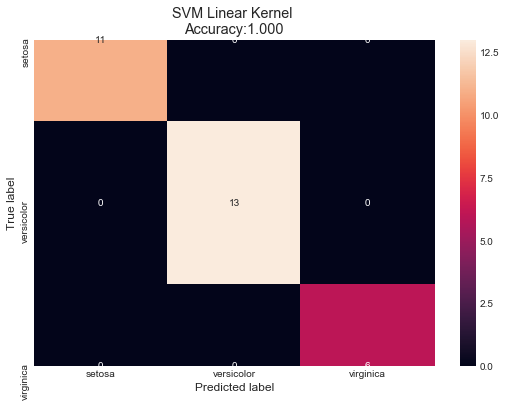

In [61]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 3. Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Test Accuracy for Scikit-Learn model:', accuracy_score(y_test, y_pred)* 100,'%')

Test Accuracy for Scikit-Learn model: 100.0 %


In [63]:
print(accuracy_score(y_test, y_pred))    
print(confusion_matrix(y_test, y_pred))    
print(classification_report(y_test, y_pred))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



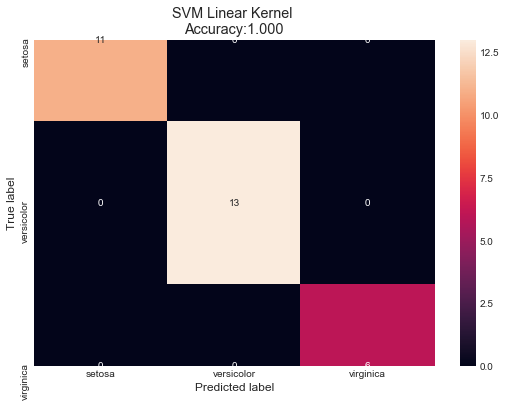

In [64]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 4. Random Forest Classifier

In [65]:
# import
from sklearn.ensemble import RandomForestClassifier

# initialize
clf = RandomForestClassifier()

# train the classifier using the training data
clf.fit(x_train, y_train)

RandomForestClassifier()

In [66]:
y_pred = clf.predict(x_test)

In [67]:
print(accuracy_score(y_test, y_pred))    
print(confusion_matrix(y_test, y_pred))    
print(classification_report(y_test, y_pred))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



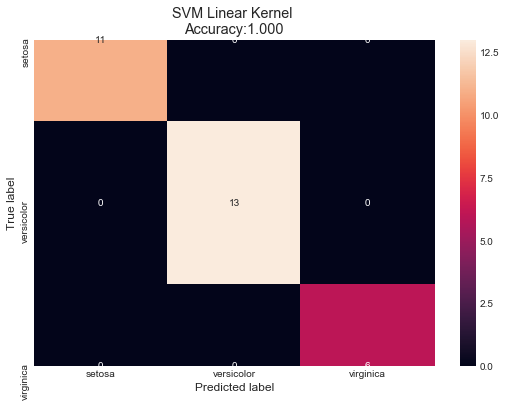

In [68]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()